**Brian Blaylock**  
**May 20, 2019**

# Cartopy: Add NEXRAD mosaic image from Iowa Environmental Mesonet

Iowa Environmental Mesonet generates NEXRAD moasic `.png` images every 5 minutes and arches them served as a Web Map Service. See the below URL for colormap. This notebook shows how to add those images to a cartopy axis.

Source: https://mesonet.agron.iastate.edu/docs/nexrad_composites/

- **N0R**: Base Reflectivity - 4 bit/5 dbz resolution (_depreciated?_)
- **N0Q**: Base Reflectivity - 8 bit/0.5 dbz resoltion

In [7]:
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

## Plot both **N0R** and **N0Q** images side-by-side for a specific date

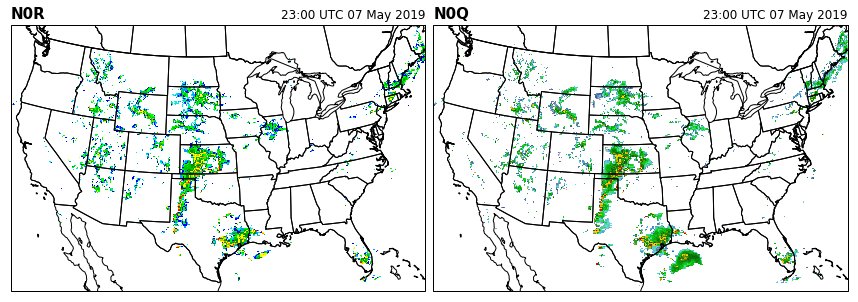

In [25]:
DATE = datetime(2019, 5, 7, 23)

fig = plt.figure(figsize=(15, 5))

versions = ['n0r', 'n0q']

for i, ver in enumerate(versions):
    ax = fig.add_subplot(1, len(versions), i+1,
                         projection=ccrs.LambertConformal(central_longitude=-100))
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax.add_feature(cfeature.BORDERS.with_scale('50m'))
    ax.add_feature(cfeature.STATES.with_scale('50m'))

    # Date string format for data request
    strDATE = DATE.strftime('%Y-%m-%dT%H:%M:%SZ')

    ax.set_title('%s' % DATE.strftime('%H:%M UTC %d %b %Y'), loc='right')
    ax.set_title(ver.upper(), loc='left', fontweight='bold', fontsize=15)
    ax.add_wms(wms='https://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/%s-t.cgi?' % ver,
                layers='nexrad-%s-wmst' % ver,
                wms_kwargs={'time':strDATE})
                                        
    ax.set_extent([-120, -75, 23, 50])

fig.subplots_adjust(wspace=0.02)

## Plot the most recent time available
Simply leave out the 'time' argument in the `wms_kwargs` dict. I'm not sure how to see the timestamp on the image that is returned to make sure it is actually within 5 minutes of the current time.

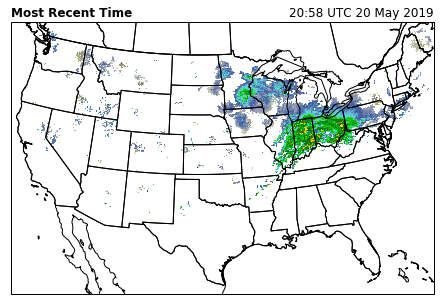

In [24]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=-100))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

# Date string format for data reques

ax.set_title('Most Recent Time', fontweight='bold', loc='left')
ax.set_title('%s' % datetime.utcnow().strftime('%H:%M UTC %d %b %Y'), loc='right')
ax.add_wms(wms='https://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/n0q-t.cgi?',
            layers='nexrad-n0q-wmst')

ax.set_extent([-120, -75, 23, 50])

fig.subplots_adjust(wspace=0.02)